In [1]:
using PyPlot

INFO: Loading help data...


In [9]:
exp( 1.0im * linspace(0,2*π,4 + 1)[1:4])

4-element Array{Complex{Float64},1}:
           1.0+0.0im
   6.12323e-17+1.0im
 -1.0+1.22465e-16im 
  -1.83697e-16-1.0im

In [35]:
function regular_polygon_integrand(n)
    prevertices = exp( 1.0im * linspace(0, 2*π, n + 1)[1:n])
    
    function along_angle(θ)
        function integrand(r)
            z = prod([(1.0 - r*exp(θ*1.0im)/prevertex )^(-2.0/n) for prevertex in prevertices])
            z / abs(z)
        end
    end
end

regular_polygon_integrand (generic function with 1 method)

In [37]:
quadgk(regular_polygon_integrand(4)(2.0), 0, 1.0)[1]

0.9910074729373095 + 0.08366861289842432im

In [40]:
regular_polygon_integrand(4)(π/2.0)(0.2)

1.0 + 2.453100097673777e-18im

In [43]:
function integrand(r, n, θ)
    prevertices = exp( 1.0im * linspace(0, 2*π, n + 1)[1:n])
    prod([(1.0 - r*exp(θ*1.0im)/prevertex ) for prevertex in prevertices])
end

integrand (generic function with 1 method)

In [46]:
integrand(0.4,4,5.0)

0.9895530992175775 - 0.02337139841862737im

In [160]:
function integrand( vertex_angles, vertex_locations , θ)
    realpart = exp( sum( log(0.5)/2.0* vertex_angles.*log(1.0 - cos(θ - vertex_locations))) )
    anglepart = 1.0im * exp(-1.0im * (sum( vertex_angles .* (sign(θ - vertex_locations)*π/2.0 + vertex_locations - θ)) + θ))
    realpart * anglepart
end

integrand (generic function with 1 method)

In [161]:
function lengths(vertex_angles, vertex_locations)
    n = length(vertex_angles)
    [ quadgk(t -> integrand( vertex_angles, vertex_locations, t), 
                            vertex_locations[i] + 1e-5, 
        vertex_locations[(i % n)+1] - 1e-5)[1]
        for i in 1:(n-1)]
end

lengths (generic function with 1 method)

In [167]:
L = lengths( [0.5, 0.5, 0.5, 0.5], [0, 0.05*π, π, 1.05*π])
[ abs(l) for l in L ]

3-element Array{Any,1}:
 1.19739
 2.61879
 1.19739

In [155]:
L = lengths( [2.0/5.0, 2.0/5.0, 2.0/5.0, 2.0/5.0, 2.0/5.0], π * [0, 2.0/5.0, 4.0/5.0, 6.0/5.0, 8.0/5.0])
#[abs(l) for l in L]

4-element Array{Any,1}:
 -1.57263-1.14258im
 -1.57263-1.14258im
 -1.57263-1.14258im
 -1.57263-1.14258im

In [104]:
print(quadgk(t -> integrand( [0.5, 0.5, 0.5, 0.5], [0, π/2.0, π, 1.5*π], t), 1e-6, 0.5*π - 1e-6)[1])
print(quadgk(t -> integrand( [0.5, 0.5, 0.5, 0.5], [0, π/2.0, π, 1.5*π], t), 0.5*π + 1e-6, π-1e-6)[1])

-1.3877787807814457e-17 - 1.4316471934821366im1.4316471934821375 - 1.2611439670351388e-14im

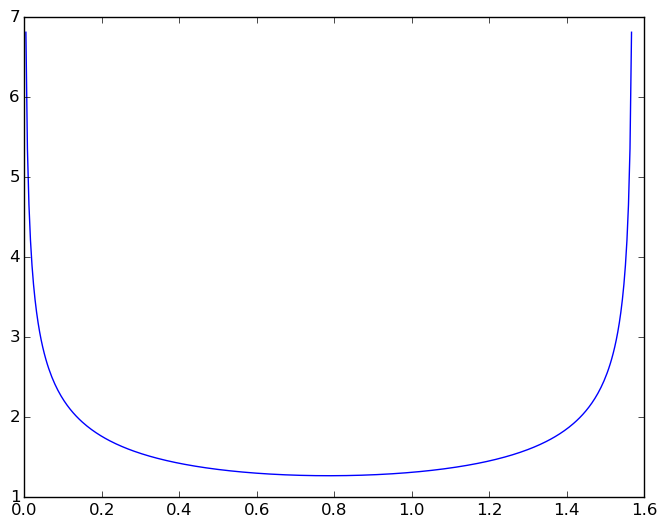

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xa9d47c0c>

In [75]:
T = linspace(0,π/2.0, 400)
plot(T, [integrand( [0.5, 0.5, 0.5, 0.5], [0, π/2.0, π, 1.5*π], t) for t in T])

In [219]:
function f( prevertices, poly_angles, z)
    r, θ = abs(z), angle(z)
    function integrand(r)
        exp(
          -sum(
            poly_angles .* (log(2.0)/2.0*log(1.0-r*cos(θ - prevertices)) 
          + 1.0im*atan2(r*sin(θ-prevertices), 1.0 - r*cos(θ - prevertices) ) ))
          + 1.0im*θ
        )
    end
    quadgk(integrand, 0, r)[1]
end

f (generic function with 1 method)

In [223]:
R = linspace(0.1, 1.0, 20)*ones(50)'; Theta = ones(20)*linspace(0,2*π, 50)';
Z = R .* exp( 1.0im* Theta);

In [224]:
W = [f( [0, 0.5*π, π, 1.5*π], [0.5, 0.5, 0.5, 0.5], z) for z in Z];

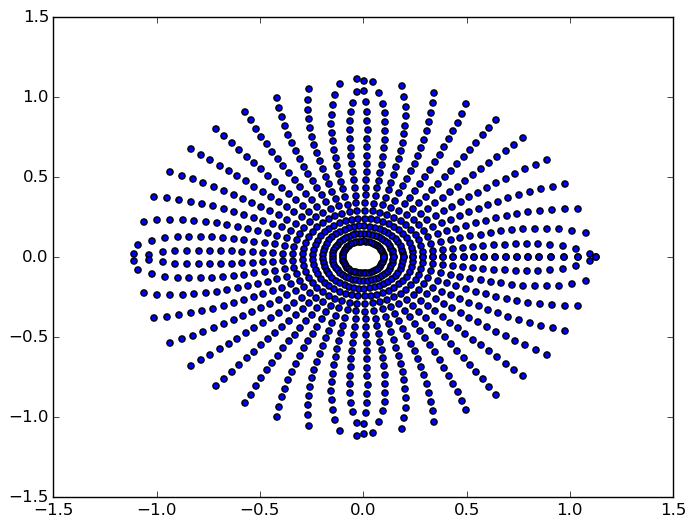

In [225]:
scatter(real(W), imag(W)); #plot(real(Z), imag(Z));